# Visualizing FordGoBike Trip Data
## by Abdulrahman Alyahya

## Investigation Overview

> In this investigation, I wanted to look at to the customer behaviour characteristics, I  focused on time, age, gender, duration, and user type to analyze and understand the usage of bike When, Who, How?

## Dataset Overview

> The forgobike trip data are 3,177,270 rides that happend in 2017, 2018 and 2019 (until May)

In [8]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('forgobike-tripdata-master.csv')

In [6]:
df.head(1)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_share_for_all_trip,member_age,age_category,start_time_month,start_time_monthly,start_time_day,start_time_hour,end_time_hour,duration_min,distance_km
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,120.0,Mission Dolores Park,37.76142,-122.426435,285.0,Webster St at O'Farrell St,37.783521,...,No,33.0,31-40,January,18-01,Wednesday,22,19,1254.733333,2.488001


In [12]:
sns.set(style="whitegrid", font_scale=1.25, rc={'figure.figsize':(20,7)})
base_color = sns.color_palette()[0]

## (Visualization 1)

> In our dataset there are two type of user: <br>
    - Subscriber
    - Customer
  In the next visualization I will show the percentage of bike rides for all members user type

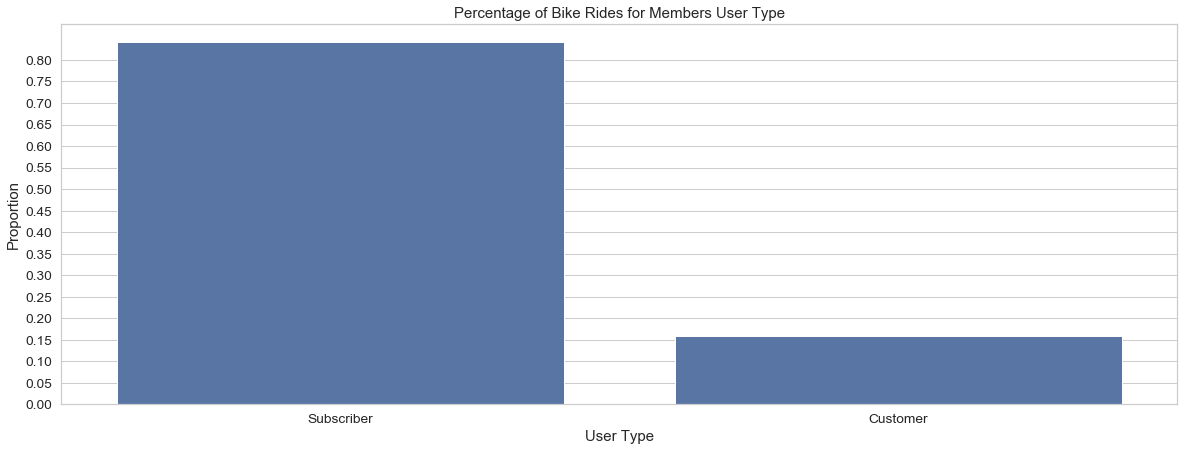

In [21]:
n_points = df.shape[0]

max_count_age = df['user_type'].value_counts().max()
max_prop_age = max_count_age / n_points

tick_props_age = np.arange(0, max_prop_age, 0.05)
tick_names_age = ['{:0.2f}'.format(v) for v in tick_props_age]

sns.countplot(data=df, x='user_type', color=base_color)

ax = plt.gca()
plt.yticks(tick_props_age * n_points, tick_names_age)
ax.set_ylabel('Proportion')
ax.set_xlabel('User Type')
ax.set_title("Percentage of Bike Rides for Members User Type", fontsize=15);

## (Visualization 2)

> Based on our data we have three gender male, female and other. In the next visualization I will show the number of bike rides for each day based on gender

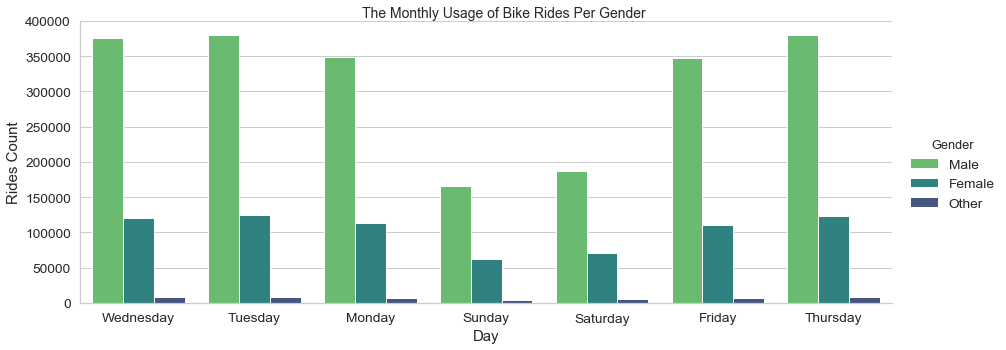

In [26]:
lm = sns.catplot(data=df, x='start_time_day', hue='member_gender', kind='count',aspect=20.7/8.27, palette='viridis_r')

lm.set_axis_labels('Day', 'Rides Count')
lm._legend.set_title('Gender')
lm.fig.suptitle('The Monthly Usage of Bike Rides Per Gender', fontsize=14);

## (Visualization 3)

In this Visualization I will show number of bike rides over time based on age category.<br>
I divided members age into 5 categories.
- 11-20
- 21-30
- 31-40
- 41-50
- 51-60 <br>

So, I will show number of bike rides per category over time.

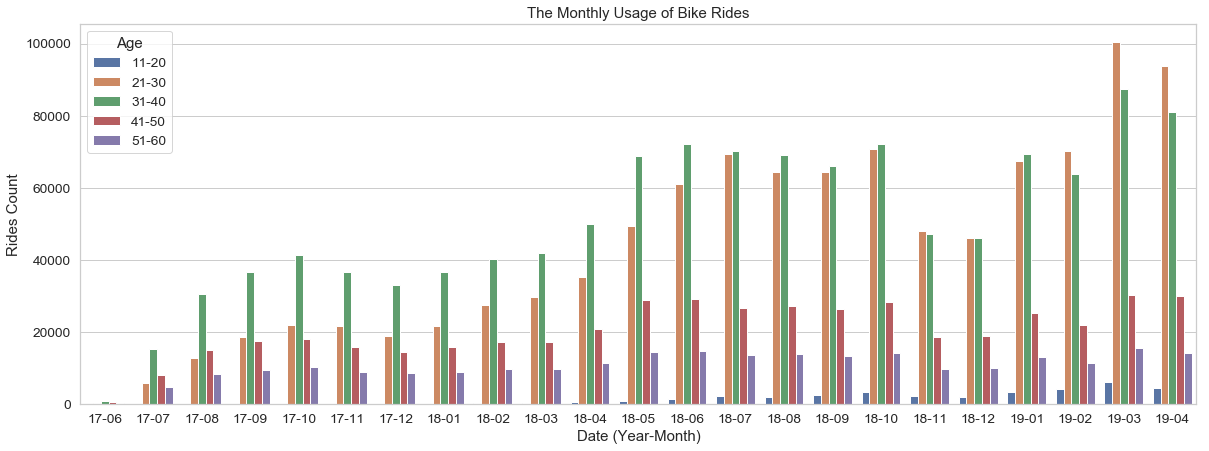

In [35]:
my_order = ['11-20', '21-30', '31-40', '41-50', '51-60']
ax = sns.countplot(x='start_time_monthly', hue='age_category', hue_order=my_order,
                   data=df.sort_values(by=['start_time_monthly']))

ax.legend().set_title('Age')
ax.set_ylabel('Rides Count')
ax.set_xlabel('Date (Year-Month)')
ax.set_title("The Monthly Usage of Bike Rides", fontsize=15);

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert communicate-data-findings-slide-deck.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!